# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Annisa Risty
- **Email:** annisaaristyy@gmail.com
- **ID Dicoding:** annisa_risty_Q35I

## Menentukan Pertanyaan Bisnis

- Kapan sepeda paling banyak dirental?
- Hal apa yang paling diperhatikan oleh kostumer saat ingin merental sepeda?



## Import Semua Packages/Library yang Digunakan

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [125]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [126]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df menunjukkan rekapitulasi aktivitas peminjaman sepeda setiap hari
- hour_day menunjukkan rekapitulasi aktivitas peminjaman sepeda setiap jam

### Assessing Data

In [127]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [128]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [129]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [130]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada ada yang hilang dari kedua data frame
- Kesalahan tipe data pada dteday yang seharusnya dalam bentuk datetime
- Tidak ada data duplikat pada kedua data frame


### Cleaning Data

In [131]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

hour_df['temp'] = hour_df['temp'] * 41
day_df['temp'] = day_df['temp'] * 41

hour_df['windspeed'] = hour_df['windspeed'] * 67
day_df['windspeed'] = day_df['windspeed'] * 67

hour_df['hum'] = hour_df['hum'] * 100
day_df['hum'] = day_df['hum'] * 100

hour_df['atemp'] = hour_df['atemp'] * 50
day_df['atemp'] = day_df['atemp'] * 50

In [132]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tidak perlu dilakukan banyak data cleaning pada data frame ini karena data yang ada sudah terbilang baik
- Data type puntuk kolom dteday diganti menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [134]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


**Insight**

- Peminjaan paling banyak terjadi pada saat working day
- Tidak ada aktivitas peminjaman sepeda yang terjadi saat cuaca 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [135]:

day_df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"]
})

cnt       temp                                
            sum        max        min       mean       std
season                                                    
1        471348  23.472500   2.424346  12.207650  4.212136
2        918589  33.141653  10.374763  22.320611  5.028649
3       1061129  35.328347  19.235847  28.958682  2.904749
4        841613  26.957500   9.054153  17.339148  4.421179

**Insight**

season (1:springer, 2:summer, 3:fall, 4:winter)

- Kostumer paling sedikit menyewa sepeda pada spring season
- Kostumer paling banyak menyewa sepeda saat fall season
- Suhu tidak terlalu berpengaruh pada waktu peminjaman sepeda karena terlihat nilai mean tiap seasonnya sangat bervariasi dengan jumlah peminjaman tidak terlalu jauh

In [136]:
day_df.groupby(by="weathersit").agg({
    "cnt": "sum",
    "hum": ["max", "min", "mean", "std"]
})

cnt      hum                               
                sum      max      min       mean        std
weathersit                                                 
1           2257952  83.5833  18.7917  56.559439  11.247237
2            996858  97.2500  40.7083  72.588678  10.964757
3             37869  97.0417   0.0000  84.887248  20.157218


note:

hum: Normalized humidity. The values are divided to 100 (max)

weathersit :

  1: Clear, Few clouds, Partly cloudy, Partly cloudy

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Insight:**
- Peminjaman sepeda paling banyak terjadi di cuaca 1
- Tidak ada satupun peminjaman sepeda di cuaca 4
- Aktivitas peminjaman sepeda tidak terlalu berpengaruh pada kelembapan udara


In [137]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_cnt = day_df['cnt'].sum()

data = {'Category': ['Casual', 'Registered', 'Total'],
        'Sum': [total_casual, total_registered, total_cnt]}

summary_df = pd.DataFrame(data)

summary_df


,Category,Sum
0,Casual,620017
1,Registered,2672662
2,Total,3292679


In [138]:
day_df.groupby(by="workingday").agg({
    "cnt": "sum",
    "windspeed": ["max", "min", "mean", "std"]
})

cnt  windspeed                               
                sum        max       min       mean       std
workingday                                                   
0           1000269  34.000021  2.834381  12.906067  5.238989
1           2292410  29.584721  1.500244  12.696284  5.174598

note:

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

**Insight**

- Peminjaman sepeda terjadi paling banyak di hari kerja
- Kostumer cenderung meminjam sepeda ketika angin tidak terlalu kencang

In [139]:
most_rent_days = day_df.nlargest(5, 'cnt')

top5 = pd.DataFrame(most_rent_days)
top5
#print(most_rent_days[['dteday', 'cnt']])


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,22.242500,26.51480,54.2917,15.249468,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884,8294


### Explore Data hour_df

In [140]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [141]:
hour_df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"]
})

cnt   temp                            
            sum    max    min       mean       std
season                                            
1        471348  29.52   0.82  12.265012  4.867764
2        918589  38.54   6.56  22.331191  5.708559
3       1061129  41.00  15.58  28.962816  3.850012
4        841613  31.16   5.74  17.348658  5.008863

In [142]:
hour_df.groupby(by="weathersit").agg({
    "cnt": "sum",
    "hum": ["max", "min", "mean", "std"]
})

cnt    hum                            
                sum    max   min       mean        std
weathersit                                            
1           2338173  100.0   8.0  57.374660  17.846308
2            795952  100.0   0.0  69.880722  17.247824
3            158331  100.0   0.0  82.763214  15.736961
4               223   93.0  86.0  88.333333   4.041452

In [143]:
hour_df.groupby(by="weekday").agg({
    "cnt": "sum",
    "windspeed": ["max", "min", "mean", "std"]
})

cnt windspeed                          
            sum       max  min       mean       std
weekday                                            
0        444027   56.9969  0.0  12.602223  8.026898
1        455503   47.9988  0.0  12.653819  8.279961
2        469109   51.9987  0.0  12.858461  8.167631
3        473048   43.0006  0.0  12.540538  8.187149
4        485395   46.0022  0.0  12.863143  8.105355
5        487790   54.0020  0.0  12.490831  8.200318
6        477807   55.9986  0.0  13.144739  8.393605

**Insight**

* Aktivitas peminjaman sepeda relatif sama setiap harinya

In [157]:
combine_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
combine_df.head()


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6,0,1,9.84,14.395,75.0,0.0,0,1,1


## Visualization & Explanatory Analysis

### Kapan sepeda paling banyak dirental?


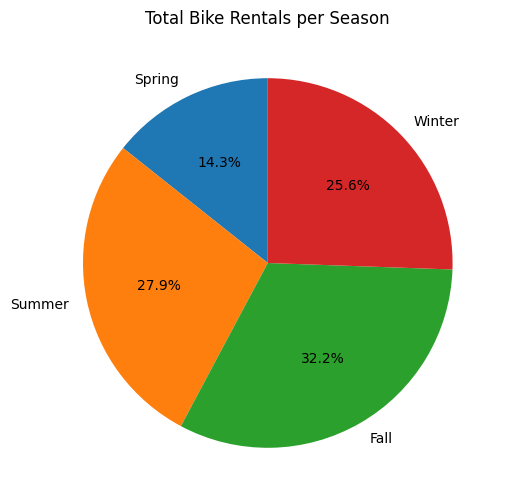

In [144]:
season_pie = day_df.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 6))
plt.pie(season_pie, labels=['Spring', 'Summer', 'Fall', 'Winter'], autopct='%1.1f%%', startangle=90)
plt.title('Total Bike Rentals per Season')
plt.show()

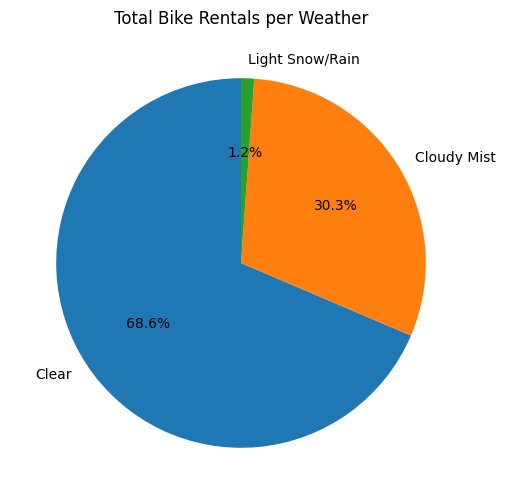

In [145]:
weathersit_pie = day_df.groupby('weathersit')['cnt'].sum()

plt.figure(figsize=(8, 6))
plt.pie(weathersit_pie, labels=['Clear', 'Cloudy Mist', 'Light Snow/Rain'], autopct='%1.1f%%', startangle=90)
plt.title('Total Bike Rentals per Weather')
plt.show()


**Insight**

- Konsumer paling banyak meminjam sepeda pada fall season saat cuaca tidak terlalu panas dan tidak terlalu dingin
- Tidak ada aktivitas peminjaman sepeda saat hujan deras

### Hal apa yang paling diperhatikan oleh kostumer saat ingin merental sepeda?

Korelasi antara temperatur dan cnt: 0.627494009033492


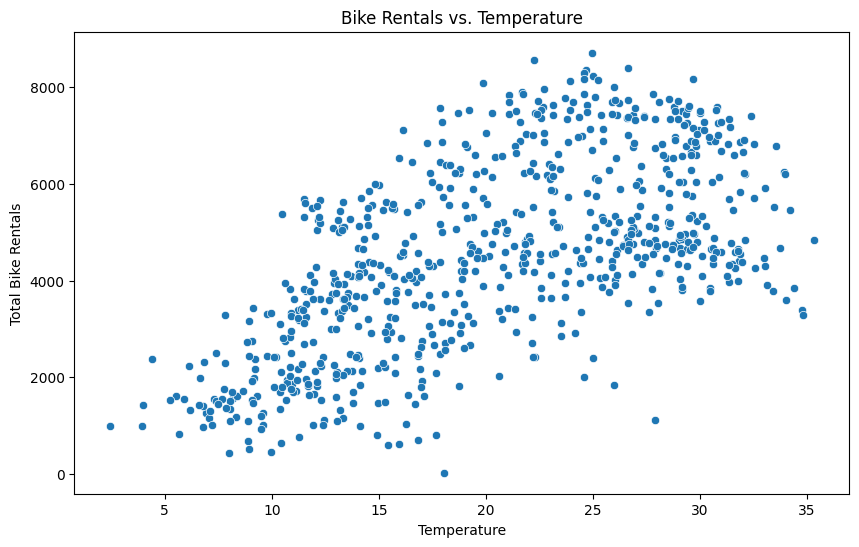

In [151]:
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara temperatur dan cnt: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()


Korelasi antara kecepatan angin dan cnt: -0.2345449974216701


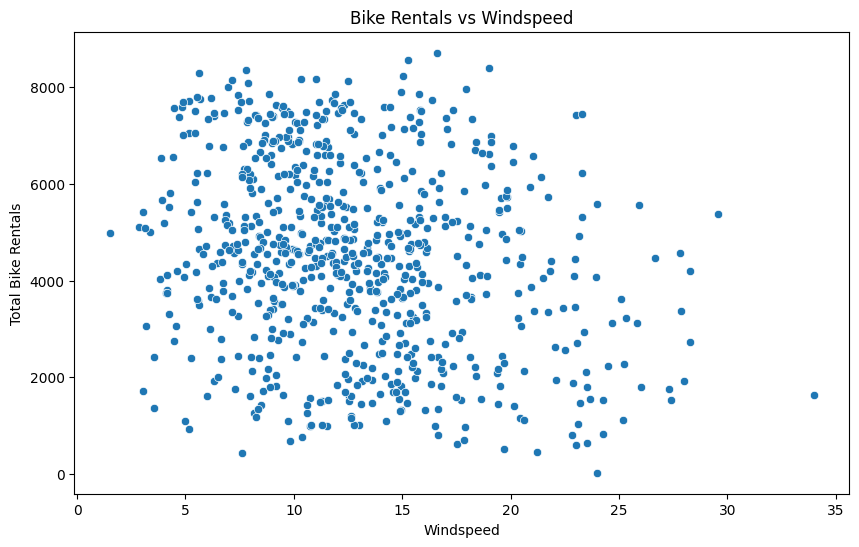

In [154]:
correlation = day_df['windspeed'].corr(day_df['cnt'])
print(f"Korelasi antara kecepatan angin dan cnt: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Bike Rentals vs Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Total Bike Rentals')
plt.show()

Korelasi antara kelembapan dan cnt: -0.10065856213715525


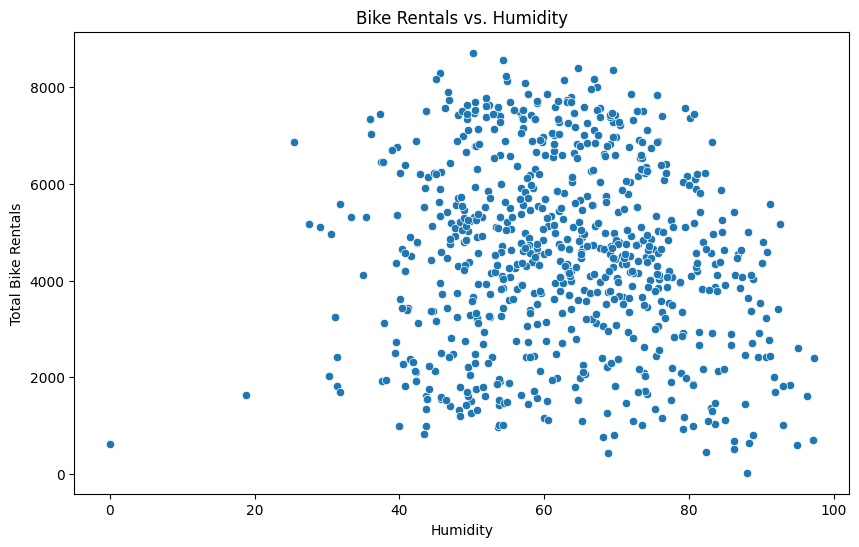

In [155]:
correlation = day_df['hum'].corr(day_df['cnt'])
print(f"Korelasi antara kelembapan dan cnt: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Bike Rentals vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Total Bike Rentals')
plt.show()

**Insight:**
- Kostumer paling banyak menyewa sepeda saat temperatur udara berada di rentang 20-30 derajat celcius.
- Tidak ada korelasi antara kecepatan angin dan kelembapan udara dengan banyaknya peminjaman sepeda yang terjadi

## Analisis Lanjutan (Opsional)

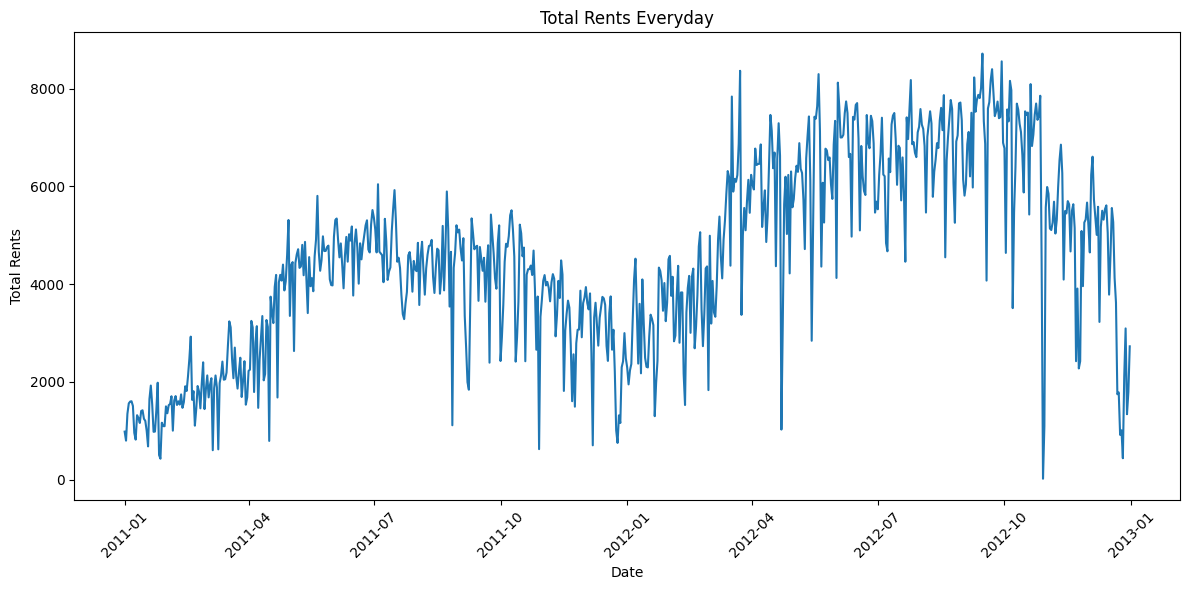

In [147]:
daily_rental_counts = day_df.groupby('dteday')['cnt'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_rental_counts.index, daily_rental_counts.values)
plt.xlabel('Date')
plt.ylabel('Total Rents')
plt.title('Total Rents Everyday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

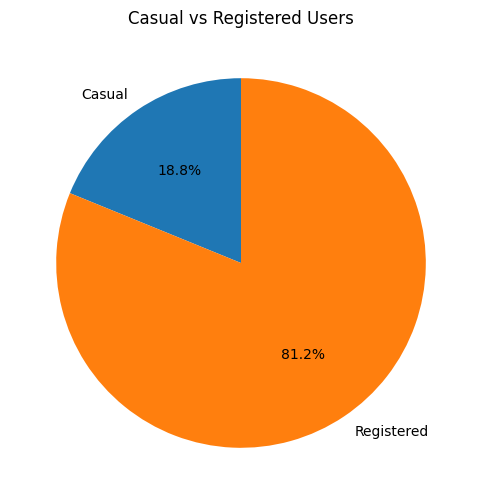

In [156]:
user_pie = pd.DataFrame({'Category': ['Casual', 'Registered'], 'Count': [day_df['casual'].sum(), day_df['registered'].sum()]})

plt.figure(figsize=(8, 6))
plt.pie(user_pie['Count'], labels=user_pie['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Casual vs Registered Users')
plt.show()


**Note**

Analisis RFM tidak dapat dilakukan pada data frame ini karena tidak terdapat data mengenai segmentasi pelanggan berdasarkan tiga parameter: recency, frequency, dan monetary

## Conclusion

- Sepeda paling banyak dirental pada fall season saat cuaca cerah
- Temperatur merupakan hal yang paling berpengaruh pada jumlah peminjaman sepeda setiap harinya, konsumer cenderung menyewa sepeda saat suhu tidak terlalu panas dan tidak terlalu dingin.